#                           Learning Curves Using Scikit-learn

In [7]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve 
import matplotlib.pyplot as plt


electricity = pd.read_excel('Folds5x2_pp.xlsx')
print(electricity.info())
electricity.head(3)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB
None


,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56


In [4]:
#Deciding upon the training set sizes
'''Given that our training set will have 7654 instances, the maximum value we can use to generate 
our learning curves is 7654. For our case, here, we use these six sizes:'''
train_sizes = [1, 100, 500, 2000, 5000, 7654]

In [5]:

features = ['AT', 'V', 'AP', 'RH']
target = 'PE'
train_sizes, train_scores, validation_scores = learning_curve(
estimator = LinearRegression(),
X = electricity[features],
y = electricity[target], train_sizes = train_sizes, cv = 5,
scoring = 'neg_mean_squared_error')
print('Training scores:\n\n', train_scores)
print('\n', '-' * 70) # separator to make the output easy to read
print('\nValidation scores:\n\n', validation_scores)

In [8]:
print('Training scores:\n\n', train_scores)
print('\n', '-' * 70) # separator to make the output easy to read
print('\nValidation scores:\n\n', validation_scores)

Training scores:

 [[ -0.          -0.          -0.          -0.          -0.        ]
 [-19.71230701 -18.31492642 -18.31492642 -18.31492642 -18.31492642]
 [-18.14420459 -19.63885072 -19.63885072 -19.63885072 -19.63885072]
 [-21.53603444 -20.18568787 -19.98317419 -19.98317419 -19.98317419]
 [-20.47708899 -19.93364211 -20.56091569 -20.4150839  -20.4150839 ]
 [-20.98565335 -20.63006094 -21.04384703 -20.63526811 -20.52955609]]

 ----------------------------------------------------------------------

Validation scores:

 [[-619.30514723 -379.81090366 -374.4107861  -370.03037109 -373.30597982]
 [ -21.80224219  -23.01103419  -20.81350389  -22.88459236  -23.44955492]
 [ -19.96005238  -21.2771561   -19.75136596  -21.4325615   -21.89067652]
 [ -19.92863783  -21.35440062  -19.62974239  -21.38631648  -21.811031  ]
 [ -19.88806264  -21.3183303   -19.68228562  -21.35019525  -21.75949097]
 [ -19.9046791   -21.33448781  -19.67831137  -21.31935146  -21.73778949]]


Since we specified six training set sizes, you might have expected six values for each kind of score. 
Instead, we got six rows for each, and every row has five error scores. 
This happens because learning_curve() runs a k-fold cross-validation under the hood,
where the value of k is given by what we specify for the cv parameter. In our case, cv = 5, so there will be five splits. 
For each split, an estimator is trained for every training set size specified. Each column in the two arrays above designates 
a split, and each row corresponds to a test size. Below is a table for the training error scores to help you understand the 
process better:
scoring — indicates the error metric to use; the intention is to use the mean squared error (MSE) metric, but that’s not a possible parameter for scoring; we’ll use the nearest proxy, negative MSE, and we’ll just have to flip signs later on.


![alt text](scores.jpg "Title")




In [12]:
'''To plot the learning curves, we need only a single error score per training set size, not 5. For this reason,
we take the mean value of each row and also flip the signs of the error scores'''

train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)
print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))

Mean training scores

 1       -0.000000
100     18.594403
500     19.339921
2000    20.334249
5000    20.360363
7654    20.764877
dtype: float64

 --------------------

Mean validation scores

 1       423.372638
100      22.392186
500      20.862362
2000     20.822026
5000     20.799673
7654     20.794924
dtype: float64


(0.0, 40.0)

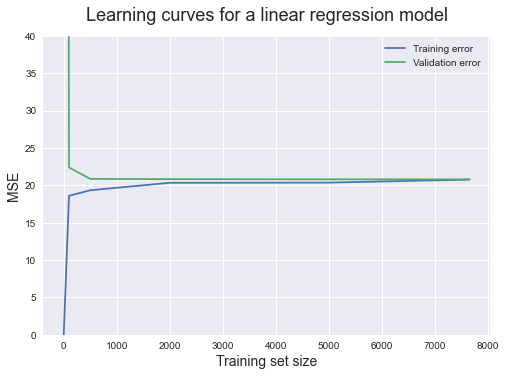

In [13]:
'''we can see that the MSE for the training set is 0. This is normal behavior, since the model has no problem 
fitting perfectly a single data point. So when tested upon the same data point, the prediction is perfect. 
But when tested on the validation set (which has 1914 instances), the MSE rockets up to roughly 423.4. 
This relatively high value is the reason we restrict the y-axis range between 0 and 40.
'''

import matplotlib.pyplot as plt

plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a linear regression model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0,40)

From 500 training data points onward, the validation MSE stays roughly the same. This tells us something extremely important:
    adding more training data points won’t lead to significantly better models. So instead of wasting time (and possibly money)
    with collecting more data, we need to try something else, 
    like switching to an algorithm that can build more complex models
    Adding more features, however, is a different thing and is very likely to help because it will increase the complexity of our current model.
    
![alt text](Images/IMG2.png "Title")
![alt text](Images/IMG3.png "Title")
![alt text](Images/IMG4.png "Title")

clearly it's the left case in our curve not the right
Our learning algorithm suffers from high bias and low variance, underfitting the training data.

In [14]:
from sklearn.ensemble import RandomForestRegressor

train_sizes, train_scores, validation_scores = learning_curve(
estimator = RandomForestRegressor(),
X = electricity[features],
y = electricity[target], train_sizes = train_sizes, cv = 5,
scoring = 'neg_mean_squared_error')
print('Training scores:\n\n', train_scores)
print('\n', '-' * 70) # separator to make the output easy to read
print('\nValidation scores:\n\n', validation_scores)



Training scores:

 [[-4.65289095e-25 -3.23117427e-27 -3.23117427e-27 -3.23117427e-27
  -3.23117427e-27]
 [-3.72905814e+00 -3.61530556e+00 -3.49366975e+00 -3.83416425e+00
  -3.60539350e+00]
 [-2.19740415e+00 -2.52458962e+00 -2.37596476e+00 -2.39350497e+00
  -2.44817705e+00]
 [-2.26406427e+00 -2.09008317e+00 -2.06900776e+00 -2.08869292e+00
  -2.12552926e+00]
 [-1.69063061e+00 -1.61899333e+00 -1.71535327e+00 -1.72830846e+00
  -1.79338660e+00]
 [-1.55084281e+00 -1.54559083e+00 -1.63141441e+00 -1.61643891e+00
  -1.54649255e+00]]

 ----------------------------------------------------------------------

Validation scores:

 [[-619.30514723 -379.81090366 -374.4107861  -370.03037109 -373.30597982]
 [ -24.04878484  -21.97124154  -21.10395244  -21.8856134   -22.49145494]
 [ -17.67067103  -19.38203785  -17.87718329  -19.68117949  -19.99823323]
 [ -14.9684664   -16.00777524  -14.18284175  -14.9503148   -15.54858605]
 [ -12.60724947  -13.00734574  -11.27746068  -12.01151413  -13.00297705]
 [ -11.408

'Our learning algorithm (random forests) suffers from high variance and quite a low bias, overfitting the training data.\nAdding more training instances is very likely to lead to better models under the current learning algorithm.\nIncrease the regularization for our current learning algorithm. This should decrease the variance and increase the bias.\nReducing the numbers of features in the training data we currently use. The algorithm will still fit the training data very well, \nbut due to the decreased number of features, it will build less complex models. This should increase the bias and decrease the \nvariance.'

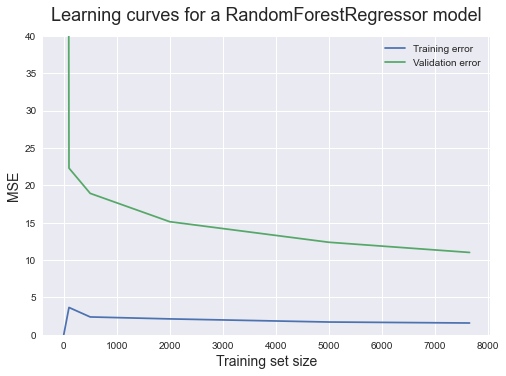

In [19]:
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)

plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a RandomForestRegressor model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0,40)

'''Our learning algorithm (random forests) suffers from high variance and quite a low bias, overfitting the training data.
Adding more training instances is very likely to lead to better models under the current learning algorithm.
Increase the regularization for our current learning algorithm. This should decrease the variance and increase the bias.
Reducing the numbers of features in the training data we currently use. The algorithm will still fit the training data very well, 
but due to the decreased number of features, it will build less complex models. This should increase the bias and decrease the 
variance.'''

'''For classification learning curve is almost identical. The main difference is that we’ll have to choose another error metric – 
one that is suitable for evaluating the performance of a classifier

Unlike what we’ve seen so far, notice that the learning curve for the training error is above the one for the validation error. 
This is because the score used, accuracy, describes how good the model is. The higher the accuracy, the better. The MSE, on 
the other side, describes how bad a model is. The lower the MSE, the better.'''

![alt text](Images/IMG5.png "Title")

